In [30]:
from utils.consts import * ## const variables are there, so paths and extraction features ##
from utils. plotting import * ## plotting ##
from data_reader_babalit import * ## the class which reads balabit dataset ##
from data_reader_chaoshen import * ## the class which reads chaoshen datasets TODO There are several issues with this dataset -> explained later ##
from legality_analyser import * ## the class which analyses the datasets with 0 1 labels --> splitting samples is being done there ##  
import random


In [31]:
users = [7,9, 12, 15,16,20,21,23,29, 35]
balabit_reader = DataReaderBalabit(BALABIT, users, False, limit = 100) ## the arguments are DATASET, users, supervised, how many records should be procesed ##



In [32]:
from RandomForestModel import *
from nonlegality_analyser import * ## the class which analyses the datasets without 0 1 labels --> splitting samples is being done there ##  


In [33]:
## Specyfing the USERS ## 
users = [7,9,15,16,20,21,23,29, 35]
## Creating the object which analyses the dataset ## 
balabit_reader = DataReaderBalabit(BALABIT, users, False, limit = 100) ## the arguments are DATASET, users, supervised, how many records should be procesed ##
balabit_reader.processDataWithoutLabels() ## creating the data without labels ##


File already exist


In [22]:
## getting path from the reader ##
path = balabit_reader.getFileName()
print(balabit_reader.fileName) 

## creating analyser class ## 
balabitAnalyser = nonLegalityAnalyser(path)
## counting how many actions were extracted ## 
print(balabitAnalyser.countActions())

processed_files\balabit_dataset_users[7, 9, 15, 16, 20, 21, 23, 29, 35]_limit100_labelsFalse.csv
type_of_action    1   3   4
userid                     
7                65  88   4
9                80  89   8
15               40  65   8
16               88  64  16
20              137  89   6
21               57  58  10
23               45  69   3
29               33  71   7
35               60  64   2


In [23]:
def createTable(best_parameters ,roc_auc):
    df = pd.DataFrame({
    'User': list(best_parameters.keys()),
    'Best Parameters': list(best_parameters.values()),
    'ROC AUC Score': list(roc_auc.values()),
})
    return df

In [24]:
from SVMmodel import *

In [25]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = SVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )
    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.7377049180327869
ROC AUC: 0.8455555555555556
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.8405797101449275
ROC AUC: 0.9310924369747899
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.5454545454545454
ROC AUC: 0.6166666666666667
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.6060606060606061
ROC AUC: 0.6728110599078341
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Set Accuracy: 0.8021978021978022
ROC AUC: 0.8402439024390244
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C':

,User,Best Parameters,ROC AUC Score
0,7,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.845556
1,9,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.931092
2,15,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.616667
3,16,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.672811
4,20,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.840244
5,21,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.819865
6,23,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.730453
7,29,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.706522
8,35,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.818182


In [26]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = SVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 2 )
    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.7704918032786885
ROC AUC: 0.90625
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.9130434782608695
ROC AUC: 0.9973214285714286
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.7045454545454546
ROC AUC: 0.9045454545454545
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test Set Accuracy: 0.6666666666666666
ROC AUC: 0.7753846153846156
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Set Accuracy: 0.7582417582417582
ROC AUC: 0.8900709219858156
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma'

,User,Best Parameters,ROC AUC Score
0,7,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.906250
1,9,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.997321
2,15,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.904545
3,16,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.775385
4,20,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.890071
5,21,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.924812
6,23,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.835526
7,29,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.918660
8,35,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.793478


In [14]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = SVMModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 4 )
    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Set Accuracy: 0.8841269841269841
ROC AUC: 0.9998767207725499
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.9235209235209235
ROC AUC: 1.0
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Test Set Accuracy: 0.7426326129666012
ROC AUC: 0.9789723320158104
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Set Accuracy: 0.703187250996016
ROC AUC: 0.938260162601626
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Set Accuracy: 0.7956204379562044
ROC AUC: 0.9767075517075517
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'ker

,User,Best Parameters,ROC AUC Score
0,7,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.999877
1,9,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",1.000000
2,15,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.978972
3,16,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.938260
4,20,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.976708
5,21,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.987554
6,23,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.955871
7,29,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.992748
8,35,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.954969


In [27]:
from RandomForestModel import *

In [35]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = RandomForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )
    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 200}
Test Set Accuracy: 0.7049180327868853
ROC AUC: 0.8649237472766885
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 200}
Test Set Accuracy: 0.7971014492753623
ROC AUC: 0.9292929292929293
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Test Set Accuracy: 0.8181818181818182
ROC AUC: 0.9242105263157895
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 300}
Test Set Accuracy: 0.6515151515151515
ROC AUC: 0.7328703703703704
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Test Set Accuracy: 0.7252747252747253
ROC AUC: 0.8495121951219512
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 30, 'n_es

,User,Best Parameters,ROC AUC Score
0,7,"{'max_depth': 30, 'n_estimators': 200}",0.864924
1,9,"{'max_depth': 30, 'n_estimators': 200}",0.929293
2,15,"{'max_depth': 10, 'n_estimators': 200}",0.924211
3,16,"{'max_depth': 20, 'n_estimators': 300}",0.732870
4,20,"{'max_depth': None, 'n_estimators': 100}",0.849512
5,21,"{'max_depth': 30, 'n_estimators': 200}",0.814167
6,23,"{'max_depth': 10, 'n_estimators': 100}",0.627530
7,29,"{'max_depth': 10, 'n_estimators': 100}",0.860000
8,35,"{'max_depth': 20, 'n_estimators': 100}",0.697811


In [29]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = RandomForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 2 )
    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Test Set Accuracy: 0.7704918032786885
ROC AUC: 0.9389400921658986
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Test Set Accuracy: 0.9130434782608695
ROC AUC: 0.9990925589836661
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 300}
Test Set Accuracy: 0.6590909090909091
ROC AUC: 0.8412698412698413
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Test Set Accuracy: 0.6212121212121212
ROC AUC: 0.7906862745098039
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Test Set Accuracy: 0.7362637362637363
ROC AUC: 0.9496951219512195
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 20, 'n_

,User,Best Parameters,ROC AUC Score
0,7,"{'max_depth': 10, 'n_estimators': 200}",0.938940
1,9,"{'max_depth': None, 'n_estimators': 100}",0.999093
2,15,"{'max_depth': 30, 'n_estimators': 300}",0.841270
3,16,"{'max_depth': None, 'n_estimators': 100}",0.790686
4,20,"{'max_depth': 10, 'n_estimators': 100}",0.949695
5,21,"{'max_depth': 20, 'n_estimators': 300}",0.992674
6,23,"{'max_depth': 10, 'n_estimators': 100}",0.891304
7,29,"{'max_depth': 20, 'n_estimators': 100}",0.826555
8,35,"{'max_depth': 20, 'n_estimators': 100}",0.853636


In [9]:
from IsolationForestModel import *

In [11]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = IsolationForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.01547997  0.1239914   0.05057775  0.13817135  0.11690423  0.14769366
  0.13658895  0.08430374 -0.14542852  0.15716756  0.1248632   0.15579418
  0.1194934   0.13734671  0.14230389  0.09283436  0.09683845  0.12103226
  0.13316086  0.09644835  0.05864403  0.00936509 -0.00622724  0.11536791
  0.11899246  0.16632194  0.13499113  0.14729103  0.14615052  0.14792411
  0.15280227  0.14015354  0.16344981  0.10536493  0.0861717   0.15092409
 -0.16637886  0.05645326  0.1232016   0.15771366  0.13758513  0.12318792
  0.07475951  0.10769114  0.11926331  0.13586218  0.1372696   0.10181307
  0.14358396  0.15766268  0.06682725  0.06398462  0.08806642  0.15424585
  0.11564267  0.14858161  0.07563563  0.08460869  0.04178312  0.07299939
  0.15114255  0.11586949  0.08527401  0.0891069   0.09945575  0.15766563
  0.13972235  0.1463612   0.14565046  0.14140948  0.11368084  0.13701811
  0.1090419   0.1578

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.05895726 -0.03349219  0.08112527  0.12553537 -0.05649951  0.07062676
  0.01374068  0.05951313  0.0597105   0.02116951 -0.06888821  0.03350789
 -0.06518669  0.12154413 -0.02831287  0.09571904  0.03943789  0.0986514
  0.03809858  0.11790478 -0.13690503  0.0423465  -0.06748735  0.03531263
  0.07525755  0.10450987  0.07516779  0.08592539  0.11640169  0.0481073
 -0.18381681  0.03155514  0.09697251  0.10187842  0.11198634  0.02648886
  0.05088712  0.01345215  0.0991617  -0.02142342  0.08366695  0.0375511
  0.09365888  0.09357038  0.09007285 -0.05702209  0.04149084  0.11690789
  0.08035117  0.07140166  0.09525155  0.06035511  0.11676081  0.05085881
  0.0533676   0.10507167  0.07427421  0.08660947  0.06557651  0.07621062
  0.10998546  0.1125608   0.08839832  0.07950679  0.12436468  0.07349806
  0.08940188  0.10547625  0.06641833  0.05434909  0.07617666 -0.0230017
 -0.11498345  0.111203  

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.03181331  0.14422979  0.16975814  0.09094099  0.03125382  0.15609164
  0.17459052  0.1655969   0.13215005 -0.09700331  0.16784723  0.15058958
  0.15023758  0.04210531  0.16472173  0.15377631  0.03375026  0.13181914
  0.13488208  0.14221204  0.06589804  0.08612816  0.08632302  0.16721209
 -0.05704505  0.13755979 -0.03905734  0.14660427  0.15340734  0.15977226
  0.08659284  0.09041776  0.1477519  -0.25450752  0.09447076  0.11286312
  0.16478547  0.15805354 -0.00588477  0.14218524  0.17965062  0.12331834
  0.08481743  0.17606333  0.0718071   0.16915173 -0.00916141  0.1705046
  0.04731682  0.16746916  0.14444686  0.08157108 -0.08172484  0.173908
  0.1788384   0.11501675  0.15449933  0.0240126   0.08696578  0.02654955
  0.10495662  0.05837732  0.09891964  0.16431199  0.00350392  0.13592338]
ROC AUC: 0.6461397058823529
Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.05146311  0.140337    0.06023064  0.12728138  0.02674944 -0.05364003
  0.13449162  0.00360514  0.1341169   0.04955389  0.09610857  0.02939138
  0.1198944   0.11690368  0.10595606  0.10936216  0.10314407  0.04183182
  0.13759229  0.07723945  0.11843249  0.04854948  0.12602304  0.13470671
  0.10570927  0.04358338  0.13714697  0.07789302  0.13061707  0.03311908
 -0.00244645 -0.0045855   0.04807248  0.13974811  0.14113188  0.14035196
 -0.01355863  0.09259153  0.03040486  0.11362116  0.14955187  0.14678827
  0.15543884  0.09511757  0.11109779 -0.09941192 -0.05073492 -0.00738051
  0.12628903  0.14800379  0.02829339  0.08037361  0.09223096  0.14235433
  0.10655441  0.12872438  0.14282397 -0.05677688 -0.00466911  0.06516538
  0.11103799  0.1094904   0.11779883 -0.08300531  0.02286205  0.14140906
  0.11644377  0.11801386 -0.01279745 -0.0222392   0.12543107  0.07116231
  0.12034655  0.1358

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [-0.06964461  0.06052418  0.10545182  0.04675563  0.09778442 -0.02038827
  0.06506104  0.11186253  0.09259238 -0.0620683  -0.02842174  0.00431566
  0.10157357  0.11624742  0.11491793  0.10960229  0.11210565  0.08968763
  0.10533262  0.01265559  0.10242987  0.09237799  0.09807404  0.0964696
  0.00894147  0.1212206   0.07760661  0.04809899 -0.06811328  0.09815672
  0.09162614  0.06951694  0.01261472  0.08503552 -0.00764021  0.08765461
  0.10726208  0.12107236  0.10125297  0.07572307  0.06467191  0.10860249
  0.13798185  0.03538266 -0.02541582  0.10166187  0.03115856  0.09335872
  0.10699072  0.07772656  0.12210507  0.06613031  0.10405229  0.11650492
  0.07322915  0.10458766  0.0792972   0.11729356  0.00382839  0.09240801
  0.11853293  0.08407217  0.12098128  0.0701936   0.0210345  -0.07605933
  0.10204775  0.09575776  0.08295398  0.08739197  0.01344288  0.09992468
  0.07210118  0.08079

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.14524869  0.13169797  0.15810655  0.13837039  0.06335365  0.10602755
  0.13345866  0.15057545  0.14831659  0.12704109  0.01306529  0.01316085
  0.16356706  0.11235012  0.1520321   0.10173714  0.07514524  0.14911928
  0.11931654  0.1499446   0.07918497  0.1511477   0.13899371  0.16459438
  0.14982623  0.13955322  0.16188783  0.15919363  0.15588273  0.14499219
  0.16668145  0.12771501  0.15656853  0.0966362   0.15489252  0.15075816
  0.16630157  0.16387358  0.15761496  0.14759795  0.13518838  0.02124852
  0.11616882  0.14990099  0.11773255  0.08358754  0.11655676  0.10436166
 -0.16898066  0.15864285  0.13769127  0.14576816  0.16958771  0.07993878
 -0.1320148   0.16036749  0.14880112  0.15634789  0.16792651  0.15791753
  0.16395607  0.1501266   0.1698477   0.15690145 -0.00926016  0.1704954
  0.11386508  0.15528106  0.1544447   0.12730531  0.08131703 -0.0666667
  0.17487896  0.137968

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.13438136  0.07092869 -0.14249127  0.12223437  0.13764671  0.09523554
 -0.00862396  0.10347222  0.1281286   0.04021041  0.04115867  0.12328327
  0.154654    0.14530407  0.13844767  0.1456102  -0.02122643  0.1252769
  0.01887357  0.12800968  0.09335682  0.04064337  0.11199174  0.16338212
  0.15454647  0.0522533   0.05443172  0.13346861  0.09149849  0.12374755
  0.11443178  0.08802009 -0.01172551  0.11687039  0.1370608   0.02458526
  0.10304412  0.12156203  0.12042733  0.09043531  0.11563939  0.05500619
  0.12153416  0.13944313  0.16020036  0.13105858  0.12476013  0.12549982
  0.14406159  0.14082645  0.14014737  0.06926168  0.08511886  0.05824024
  0.12974883  0.03652935  0.12027028  0.14623712  0.14146669  0.14756789
  0.09642748  0.14217836 -0.16978262  0.07900786  0.1393951   0.13753797
  0.14818921  0.15185942  0.06838469]
ROC AUC: 0.7394957983193277
Dataset with labels was used

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.17111521  0.15837738  0.16319651  0.09941184  0.13246949  0.09962036
  0.1530566   0.06770592  0.11801449  0.08053344  0.00396622 -0.15165348
  0.04568082  0.14150422  0.15905935  0.13414871  0.15361227  0.07746575
  0.11920158  0.15535734  0.15405878  0.09252807  0.09167227  0.1724667
  0.07686588  0.09702683  0.13757891  0.16161514  0.10120999  0.11274794
  0.02655458  0.14737663  0.16522524 -0.00036578  0.17794373  0.14164456
  0.12016799  0.15855865  0.1272842   0.17763425 -0.02057408  0.14218328
  0.17017376  0.10264463  0.08725004  0.08084143  0.16697145  0.16177017
  0.17813431  0.13426642  0.12399428  0.1466214   0.16795779 -0.08494001
  0.11789136  0.16492332  0.10521625  0.16396704  0.14534864  0.12986336
  0.16379126  0.13534204  0.11421013  0.17888255  0.13527417]
ROC AUC: 0.47438330170777987
Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.15839476  0.13491621  0.1700176   0.14525146  0.11504231  0.12000792
  0.13858459  0.09691221  0.14395586  0.12806839  0.18406814  0.14227174
 -0.01908969  0.16793351  0.14362847  0.15786192  0.18784987  0.13698791
  0.06870304  0.02691691  0.13749184  0.06175279  0.00198035  0.16045534
  0.17146438  0.17820801  0.15800719  0.05724275 -0.06543926  0.12872105
  0.02031341  0.16904957  0.10902744  0.08398369  0.17670385 -0.01820057
  0.13937267  0.10540386  0.14901835  0.14817107  0.16694989  0.18090069
  0.13655306  0.16512969 -0.01031246  0.16782177 -0.01906874  0.05428252
  0.16689074  0.08820478  0.06185612 -0.00897329  0.13788327 -0.0663898
  0.15801237  0.19086165  0.06804172  0.14778177  0.14866493  0.05028306
  0.00722978  0.05400445  0.04403388  0.08362793  0.15644294  0.07901726
  0.1548743   0.07447752  0.15408769  0.13827445  0.15573406  0.13256216
  0.16992494  0.18368

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

,User,Best Parameters,ROC AUC Score
0,7,"{'contamination': 0.05, 'max_samples': 'auto',...",0.426920
1,9,"{'contamination': 0.05, 'max_samples': 'auto',...",0.461511
2,15,"{'contamination': 0.05, 'max_samples': 'auto',...",0.646140
3,16,"{'contamination': 0.05, 'max_samples': 'auto',...",0.550327
4,20,"{'contamination': 0.05, 'max_samples': 'auto',...",0.518039
5,21,"{'contamination': 0.05, 'max_samples': 'auto',...",0.566520
6,23,"{'contamination': 0.05, 'max_samples': 'auto',...",0.739496
7,29,"{'contamination': 0.05, 'max_samples': 'auto',...",0.474383
8,35,"{'contamination': 0.05, 'max_samples': 'auto',...",0.723886


In [13]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    y_validation = np.where(y_validation == 0, -1, y_validation)
    
    model = IsolationForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 2 )

    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.13940959  0.11031911  0.05394763  0.11215192  0.10800225  0.10439771
  0.10463137 -0.05789175  0.08383291  0.12455491  0.01998585  0.13389668
  0.12988292  0.09420969  0.12680874  0.07061299  0.12462098  0.08850477
  0.08220227  0.11144095  0.12687643  0.1361613   0.14886784  0.0298712
  0.013227    0.09519166 -0.00678811  0.05266184  0.12481724  0.09430371
  0.09104245 -0.06475944  0.10112011 -0.01112793  0.08437273  0.1279359
  0.07972762  0.10571544  0.12803562  0.07658118  0.0932716   0.08870829
  0.12697868  0.13075584  0.08832069  0.13846565 -0.00651099  0.01933212
  0.08496455  0.13890021 -0.09212088  0.13769728  0.0970007   0.08717625
  0.09864735  0.13248041  0.10389976  0.11876117  0.11820641  0.1211038
  0.12317578  0.15090358  0.09628551  0.1059318   0.12211303 -0.16255851
  0.12686356  0.08892899 -0.05982676  0.11201357  0.06988042  0.04350237
  0.14165701  0.1091820

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.16054554  0.12375552  0.14482095  0.15859223  0.15928885  0.14565445
  0.11835326  0.11930312  0.0953554   0.12597339  0.13355136  0.04828374
  0.15520413  0.12525751  0.06103194  0.0951337   0.11742158  0.1356628
  0.11510598  0.14323804  0.10711788  0.15094241  0.14427055  0.14553706
  0.10985761  0.14784233  0.09707558  0.12886228  0.14882181  0.14529308
  0.15270819  0.13048464  0.14437902  0.11085222  0.14786958  0.02650564
  0.15479712  0.10981796  0.13324521  0.06093085  0.14068774  0.0887036
  0.12647676  0.14219197  0.12459111  0.15541498  0.10865538  0.13067126
  0.1242691   0.15121761  0.08887867  0.14948142  0.08629777  0.12270633
  0.12442215  0.13748921  0.12643368  0.13622086  0.12838302  0.09027711
 -0.02882525  0.1571666   0.13394685  0.10813691  0.11060482 -0.0018475
  0.09612783  0.09888227  0.11704087  0.14090011  0.08748286  0.11212914
  0.14594394  0.1514378

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.14688492  0.14192472  0.02633979  0.14288769 -0.02140907  0.11371679
  0.1548661   0.13309027  0.12750235 -0.17990836  0.11505248  0.10719506
  0.13910917 -0.02691179 -0.16447598 -0.02202516  0.13646576  0.15016246
  0.12369136  0.13158448  0.13583276 -0.02790118  0.14213072  0.12472655
  0.13717288  0.08998944  0.01456751  0.14267447  0.12524496  0.09383185
  0.1331456   0.0949336  -0.01866336  0.03039842  0.01446745  0.13149711
  0.12256152  0.07646835  0.10203337  0.11123336 -0.07473957  0.14444
  0.12560754 -0.0533632   0.14810823 -0.03135676  0.06753942  0.12521685
  0.15137365  0.15171113 -0.07747367 -0.0344659   0.01251209  0.02999049
 -0.15909231  0.12012599  0.14666729  0.10955361  0.11820511 -0.10447903
  0.0403055   0.07499916  0.13879336  0.0986031   0.11395903 -0.02202244]
ROC AUC: 0.7083333333333334
Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.16555116  0.12595861  0.15518375  0.14558112  0.08493281  0.17529376
  0.156447    0.10034265  0.12223286  0.10933846  0.17480226  0.17356913
  0.14875082  0.09239341  0.13087285  0.06874998  0.06666104  0.15165483
  0.16835671  0.15582739  0.17108784 -0.02235604  0.14717532  0.16825931
  0.0993507   0.15886567  0.14742465  0.07722238  0.16444406  0.13438994
  0.1605676   0.16754945  0.15301136  0.16627196  0.00346889 -0.01698982
  0.16753347 -0.02041233  0.10414128  0.16853879  0.0095949   0.125629
  0.0210034   0.16179845  0.16387546 -0.17032793 -0.04998858  0.10973096
  0.0505538   0.11472287  0.14687037  0.15169933  0.14758869  0.08554191
  0.07244339  0.15856176  0.1676533   0.1270389   0.07750736  0.16010278
  0.09799154  0.16386326  0.15303456  0.12688416  0.15102117  0.01352299
 -0.05904304  0.12955303  0.06159344  0.12873535  0.09008218  0.15722064
  0.0346391  -0.018637

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.12626251  0.10972798  0.09291886  0.11363254  0.13515635  0.06757742
  0.04366418  0.13915166  0.09922015  0.09909316  0.14306453  0.14054165
  0.14187659  0.12987424  0.11471765  0.14608759  0.12272212  0.14275301
  0.06061791  0.06706892  0.09570044  0.10709597  0.08751941  0.1398313
 -0.04733639  0.1103994   0.11928666  0.15302604  0.14062815  0.13002185
  0.13822301  0.04563937  0.12564538 -0.01603243  0.15129803  0.04920618
  0.11009585  0.12064895  0.1458621   0.14793297  0.14270565  0.1475558
  0.13036727  0.10681283  0.1341254   0.11545902  0.11066682  0.11122049
  0.10087226  0.14771471  0.07943765  0.15272024  0.0611889   0.14046814
  0.13216121  0.13449363  0.07754195  0.13075069 -0.04499859  0.13507235
  0.10076322  0.08462247  0.07355421  0.06441191  0.12125704  0.15115282
  0.01554336  0.08118951  0.13516266  0.11201988  0.10665843  0.09175324
  0.06522136  0.106266

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.18167741  0.20041523  0.03812588  0.18241884 -0.02128198  0.18552981
  0.17147112  0.1741209   0.0533443   0.18690401  0.19585737  0.0761277
  0.18105785  0.0969952   0.19463913  0.02494814  0.18281486  0.1470476
  0.14434311  0.17035773  0.15013527  0.16668081  0.14997823  0.15562369
  0.0938915   0.15949261  0.06705544  0.15473193  0.1482358   0.16248657
  0.19054234 -0.05650038 -0.11586096  0.19466082  0.16500259  0.1545628
  0.06447107  0.1760798   0.14557691  0.18923378 -0.08083512  0.17000698
  0.0112423   0.14261605 -0.05775866  0.11003682  0.02915903  0.07790367
 -0.12246073  0.10865755  0.16900144  0.13154616  0.06970273  0.18907019
  0.11298605  0.14964898  0.0724706   0.1814932   0.14723588  0.19071021
  0.13975808  0.16424     0.17008847  0.15395043  0.17634157  0.02178696
  0.0862449   0.19350405  0.15800606  0.18460724  0.17224376  0.14511626
  0.17166477  0.1693220

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [-0.00183077  0.0467874  -0.11237091 -0.00249841  0.12918546  0.12978121
  0.11394983  0.0544636   0.04187648  0.10675234  0.14684703  0.13209463
  0.12184795  0.06531234 -0.09470105  0.13875718  0.1406821   0.13205018
  0.14261199  0.09477826  0.06814125  0.13623879 -0.03986429  0.06061147
  0.15254229  0.13736442  0.16075169  0.13889374  0.02239984  0.1309842
  0.12177617 -0.12137523  0.14755457  0.01889366  0.07544476 -0.08389083
  0.15640844  0.10211206 -0.06911921  0.11849786  0.12258083  0.05203348
 -0.06305554  0.12449833  0.06231904  0.15583117  0.13801961  0.12426127
  0.02216765 -0.00447872  0.11694224  0.04182198  0.15025042  0.14177265
  0.11839643  0.15243303 -0.04645056  0.12041087  0.05789619  0.14906919
 -0.05410086  0.12859839 -0.08428333  0.0687602   0.12296064  0.0476097
  0.00990243  0.13273141  0.11377273]
ROC AUC: 0.7032967032967034
Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.14144197  0.08161647  0.16388482  0.07325073  0.04439967  0.15870673
  0.16080969  0.15598024  0.17948222 -0.02460348  0.15544946  0.18804479
  0.05623237 -0.09773187  0.1665741   0.17553578  0.15488333  0.15592175
  0.19439831  0.17462886  0.05351482  0.05236989  0.13419394  0.15990879
  0.08744368  0.14214441  0.07801506  0.1209155   0.17307609  0.08889783
  0.18014122  0.01327047  0.11094378  0.16380323  0.12132558  0.13486137
  0.1447423   0.04757788  0.16464044  0.15703354  0.11535076  0.17448308
  0.04909091  0.11040363  0.09297654  0.0560659   0.11042179  0.07421194
  0.13552202  0.11444164  0.17485787  0.17138044  0.15739866  0.20313842
 -0.06756164  0.0761199   0.17361032  0.14490926  0.15513361  0.09870902
 -0.01277633  0.14572915  0.126634    0.01097075  0.14239023]
ROC AUC: 0.494949494949495
Dataset with labels was used


e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

Best Hyperparameters: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 50}
Anomaly score: [ 0.16576375  0.09055421  0.15466498  0.14541154  0.10319074  0.12920554
 -0.10351371  0.12054461 -0.01219424  0.1102969   0.1294615   0.00999657
  0.09673019  0.14237177  0.17066557  0.14177428  0.12792426  0.16116258
  0.04030438 -0.10214828  0.02666794  0.14338815  0.16934964  0.14035025
  0.15149185  0.11672617  0.07608419  0.1269894  -0.04243473  0.15258353
  0.12383088  0.16687328  0.1758545   0.10560147  0.1246971   0.15578105
  0.16125993  0.08234711  0.15978707  0.12386681  0.16990431 -0.01291398
  0.04185463  0.03951341  0.17292601  0.15517748  0.17124726  0.13034004
  0.16461924  0.12825467  0.00791417 -0.00203072  0.14164893  0.07070883
  0.13431044 -0.04535785 -0.17993197  0.04013537  0.02261837  0.1437403
  0.16005696  0.10675482  0.12849416  0.08462696  0.14693663  0.10186556
  0.09862816  0.103771    0.10596779  0.16023079  0.10635709  0.16948708
  0.10313514  0.11111

e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
  File "e:\studia\magisterka\magisterka\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "e:\studia\magisterka

,User,Best Parameters,ROC AUC Score
0,7,"{'contamination': 0.05, 'max_samples': 'auto',...",0.523669
1,9,"{'contamination': 0.05, 'max_samples': 'auto',...",0.677652
2,15,"{'contamination': 0.05, 'max_samples': 'auto',...",0.708333
3,16,"{'contamination': 0.05, 'max_samples': 'auto',...",0.615646
4,20,"{'contamination': 0.05, 'max_samples': 'auto',...",0.388816
5,21,"{'contamination': 0.05, 'max_samples': 'auto',...",0.681430
6,23,"{'contamination': 0.05, 'max_samples': 'auto',...",0.703297
7,29,"{'contamination': 0.05, 'max_samples': 'auto',...",0.494949
8,35,"{'contamination': 0.05, 'max_samples': 'auto',...",0.810937


In [3]:
from RandomForestModel import *

In [10]:
from nonlegality_analyser import * ## the class which analyses the datasets without 0 1 labels --> splitting samples is being done there ##  


In [12]:
## getting path from the reader ##
path = 'processed_files\dfl_dataset_users[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]_limit300_labelsFalse.csv'

## creating analyser class ## 
dflAnalyser = nonLegalityAnalyser(path)
## counting how many actions were extracted ## 


In [7]:
users = [i for i in range(1,21)]

In [8]:
shuffle = True
fpr = {}
tpr = {}
roc_auc = {}
for legalUser in users:
    dataset = dflAnalyser.createTrainingDataWithLabel(legalUser)
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    X_train, X_validation, y_train, y_validation = dflAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = RandomForestModel(dataset, users)
    fpr[legalUser], tpr[legalUser], thr = model.evaluate(X_train, y_train, X_validation, y_validation, scale = True, user = legalUser, num_actions = 1)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")

plotROCs(fpr, tpr, roc_auc, users)

User 1 is being analyzed:
CV Accuracy: 0.73 (+/- 0.06)
Test Accuracy: 0.56
1: 0.672 threshold: 0.405
User 2 is being analyzed:


KeyboardInterrupt: 

In [26]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True

## dictionaries of fpr tpr ## 
best_parameters = {}
roc_auc = {}

# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = dflAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = dflAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)

    model = RandomForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    best_params, auc = model.getBestParams(X_train, y_train, X_validation, y_validation, scoring_type='roc_auc', num_actions = 1 )
    roc_auc[legalUser] = auc
    best_parameters[legalUser] = best_params
   


df = createTable(best_parameters, roc_auc)
df

Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Test Set Accuracy: 0.5776293823038398
ROC AUC: 0.7578287052525927
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 300}
Test Set Accuracy: 0.6978297161936561
ROC AUC: 0.8006036060159772
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Test Set Accuracy: 0.7896494156928213
ROC AUC: 0.9058711909811363
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Test Set Accuracy: 0.9616026711185309
ROC AUC: 0.9918885469628044
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Test Set Accuracy: 0.7662771285475793
ROC AUC: 0.8269337971324726
Dataset with labels was used
Scoring/ Refit ROC AUC:
Best Hyperparameters: {'max_depth': 30, '

,User,Best Parameters,ROC AUC Score
0,1,"{'max_depth': None, 'n_estimators': 300}",0.757829
1,2,"{'max_depth': 30, 'n_estimators': 300}",0.800604
2,3,"{'max_depth': None, 'n_estimators': 300}",0.905871
3,4,"{'max_depth': None, 'n_estimators': 200}",0.991889
4,5,"{'max_depth': 20, 'n_estimators': 200}",0.826934
5,6,"{'max_depth': 30, 'n_estimators': 200}",0.732924
6,7,"{'max_depth': None, 'n_estimators': 200}",0.872586
7,8,"{'max_depth': 20, 'n_estimators': 300}",0.891282
8,9,"{'max_depth': 30, 'n_estimators': 300}",0.872636
9,10,"{'max_depth': 20, 'n_estimators': 200}",0.825356


# CHECK THE PR AUC

In [1]:
## IMPORTING THE CLASSES ## 
from utils.consts import * ## const variables are there, so paths and extraction features ##
from utils. plotting import * ## plotting ##
from data_reader_babalit import * ## the class which reads balabit dataset ##
from data_reader_chaoshen import * ## the class which reads chaoshen datasets TODO There are several issues with this dataset -> explained later ##
from data_reader_singapur import * ## the class which reads singapur dataset##
from data_reader_dfl import * ## the class which reads dfl dataset ## 

from nonlegality_analyser import * ## the class which analyses the datasets without 0 1 labels --> splitting samples is being done there ##  
from legality_analyser import * ## the class which analyses the datasets with 0 1 labels --> splitting samples is being done there ##  


from SVMmodel import *
from RandomForestModel import *
from OneClassSVMModel import *
from IsolationForestModel import *

import random

In [2]:
## Specyfing the USERS ## 
users = [7,9,15,16,20,21,23,29, 35] ## those are all users 
## Creating the object which analyses the dataset ## 
balabit_reader = DataReaderBalabit(BALABIT, users, False, limit = 1000) ## the arguments are DATASET, users, supervised, how many records should be procesed ##
balabit_reader.processDataWithoutLabels() ## creating the data without labels ##



File already exist


In [3]:
## getting path from the reader ##
print(balabit_reader.fileName) 
path = balabit_reader.getFileName()

## creating analyser class ## 
balabitAnalyser = nonLegalityAnalyser(path)
## counting how many actions were extracted ## 
print(balabitAnalyser.countActions())

processed_files\balabit_dataset_users[7, 9, 15, 16, 20, 21, 23, 29, 35]_limit1000_labelsFalse.csv
type_of_action     1    3    4
userid                        
7                679  812   88
9                798  830  107
15               547  641   89
16               538  608  113
20              1141  823   95
21               704  550   90
23               494  703   61
29               357  662  112
35               672  617   94


User 7 is being analyzed:
CV Accuracy: 0.90 (+/- 0.04)
Test Accuracy: 0.89
7: 1.000 threshold: 0.466
7: Average Precision: {7: 0.9996326270974207}
User 9 is being analyzed:
CV Accuracy: 0.95 (+/- 0.02)
Test Accuracy: 0.83
9: 1.000 threshold: 0.360
9: Average Precision: {7: 0.9996326270974207, 9: 0.9998437153700143}
User 15 is being analyzed:
CV Accuracy: 0.76 (+/- 0.08)
Test Accuracy: 0.73
15: 0.984 threshold: 0.512
15: Average Precision: {7: 0.9996326270974207, 9: 0.9998437153700143, 15: 0.9837864949374718}
User 16 is being analyzed:
CV Accuracy: 0.72 (+/- 0.06)
Test Accuracy: 0.68
16: 0.973 threshold: 0.474
16: Average Precision: {7: 0.9996326270974207, 9: 0.9998437153700143, 15: 0.9837864949374718, 16: 0.9673176821283849}
User 20 is being analyzed:
CV Accuracy: 0.84 (+/- 0.04)
Test Accuracy: 0.81
20: 0.985 threshold: 0.502
20: Average Precision: {7: 0.9996326270974207, 9: 0.9998437153700143, 15: 0.9837864949374718, 16: 0.9673176821283849, 20: 0.9822640993852116}
User 21 is being ana

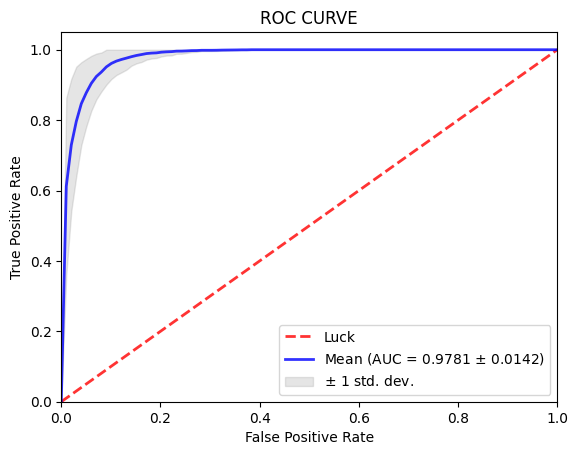

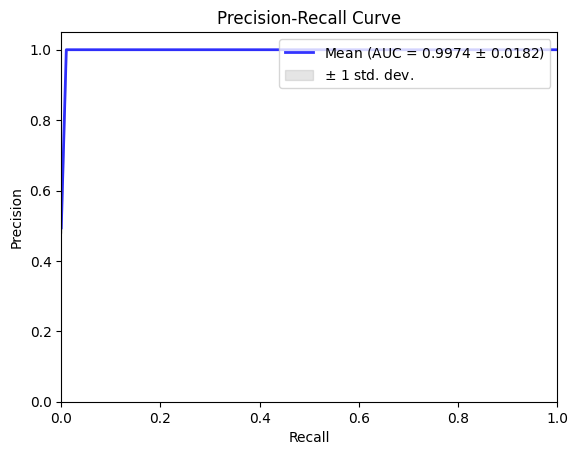

In [4]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True
## dictionaries of fpr tpr ## 
fpr = {}
tpr = {}
roc_auc = {}
precision = {}
recall = {}
average_precision = {}
# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = RandomForestModel(dataset, users)
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    fpr[legalUser], tpr[legalUser], thr, precision[legalUser], recall[legalUser], average_precision[legalUser] = model.evaluate(X_train, y_train, X_validation, y_validation, scale = True, user = legalUser)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## Equal Error Rate //brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")
    print(f"{legalUser}: Average Precision: {average_precision[legalUser]}")

plotROCs(fpr, tpr, roc_auc, users)


In [ ]:
# shuffle var will be used later in order to mix the data ## 
shuffle = True
## dictionaries of fpr tpr ## 
fpr = {}
tpr = {}
roc_auc = {}
precision = {}
recall = {}
average_precision = {}
# ONE USER IS ALWAYS LEGAL ##
for legalUser in users:
    ## this function gets all samples of legaluser and then randomly selects the samples from other users - The data will be balanced ## 
    dataset = balabitAnalyser.createTrainingDataWithLabel(legalUser, balanced = False)
    ## the last label is 1 or -1
    X = dataset[:, 0:-1]
    y = dataset[:, -1]
    ## train test split --> shuffle is used there ## if not used then data will be divided as x[0:halfTrainSamples] concatenate with X[positiveSamples: positiveSamples + trainHalfSamples]
    ## where positiveSamples is len(X/2)
    
    X_train, X_validation, y_train, y_validation = balabitAnalyser.trainingTestSplit(X, y, TEST_SIZE, shuffle)
    model = RandomForestModel(dataset, users, weight = "balanced")
    ## evaluating the model, the variables are X_train, y_train, X_validation, y_validation, scale --> use standardScler, and legalUser
    fpr[legalUser], tpr[legalUser], thr, precision[legalUser], recall[legalUser], average_precision[legalUser] = model.evaluate(X_train, y_train, X_validation, y_validation, scale = True, user = legalUser, num_actions=1)
    threshold = -1
    try:
        eer = brentq(lambda x: 1. - x - interp1d(fpr[legalUser], tpr[legalUser])(x), 0., 1.) ## Equal Error Rate //brentq znajdowanie 0 , interpid interpolacja
        threshold = interp1d(fpr[legalUser], thr)(eer)

    except (ZeroDivisionError, ValueError):
        print("Division by zero")

    roc_auc[legalUser] = auc(fpr[legalUser], tpr[legalUser])
    print(f"{legalUser}: {roc_auc[legalUser]:.3f} threshold: {threshold:.3f}")
    print(f"{legalUser}: Average Precision: {average_precision[legalUser]}")

plotROCs(fpr, tpr, roc_auc, users)
